# Proyek Analisis Data: [PRSA_Data_Wanshouxigong_20130301-20170228]
- **Nama:** [imam asrowardi]
- **Email:** [ontagrn@gmail.com)
- **ID Dicoding:** [abuzahara]

## Menentukan Pertanyaan Bisnis

1. Bagaimana kondisi cuaca (suhu, tekanan udara, kelembaban, arah angin, dan kecepatan angin) memengaruhi tingkat polusi udara, terutama konsentrasi PM2.5 dan PM10?
  - Analisis ini dapat membantu memahami pengaruh faktor lingkungan terhadap polusi udara dan memungkinkan perkiraan tingkat polusi berdasarkan kondisi cuaca, yang relevan bagi pengambilan kebijakan pengendalian polusi.
2. Apakah ada pola musiman atau harian dalam konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, CO, dan O3)?
  - Memahami pola musiman atau harian dapat membantu dalam perencanaan tindakan pencegahan untuk menjaga kualitas udara di tingkat yang aman pada waktu-waktu kritis atau musim tertentu.

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries yang diperlukan
import pandas as pd        # untuk manipulasi data
import numpy as np         # untuk komputasi numerik
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns      # untuk visualisasi data yang lebih mudah


## Data Wrangling

### Gathering Data

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import the pandas library
import pandas as pd # This line imports the pandas library and assigns it the alias 'pd'

# Specify the path to your file on Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv'  # Replace with your actual path

# Load the data into a DataFrame
new_data = pd.read_csv(file_path)

# Display the first few rows and general info to understand its structure and identify relevant business questions
new_data.head(), new_data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dt

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
 1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
 2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
 3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
 4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   
 
      PRES  DEWP  RAIN   wd  WSPM        station  
 0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
 1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
 2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
 3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
 4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  ,
 None)

**Insight:**
- Dataset ini berisi data kualitas udara dengan parameter seperti PM2.5, PM10, SO2, NO2, CO, dan O3, serta kondisi cuaca (suhu, tekanan udara, kelembaban, curah hujan) di Stasiun Wanshouxigong

### Assessing Data

In [8]:
# Assessing the data for quality issues, missing values, and distribution of key features.

# 1. Checking for missing values
missing_values = new_data.isnull().sum()

# 2. Checking basic statistics for numeric columns to understand data distributions
statistics = new_data.describe()

# 3. Assessing unique values in categorical columns like 'wd' (wind direction) and 'station' to check for consistency
unique_values = {
    'wd': new_data['wd'].unique(),
    'station': new_data['station'].unique()
}

missing_values, statistics, unique_values


(No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       696
 PM10        484
 SO2         669
 NO2         754
 CO         1297
 O3         1078
 TEMP         19
 PRES         19
 DEWP         19
 RAIN         19
 wd           79
 WSPM         13
 station       0
 dtype: int64,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.249256      1.177213      3.448752      8.800218      6.922285   
 min        1.000000   2013.000000      1.000000      1.000000      0.000000   
 25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
 50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
 75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
 max    35064.000000   2017.000000     

**Insight:**
Berikut adalah hasil penilaian awal terhadap kualitas data:

1. Kehilangan Data:
  - Beberapa kolom memiliki nilai yang hilang, khususnya pada parameter polutan seperti PM2.5 (696 nilai hilang), PM10 (484), SO2 (669), NO2 (754), CO (1,297), dan O3 (1,078).
  - Beberapa atribut cuaca seperti TEMP, PRES, DEWP, RAIN, wd (arah angin), dan WSPM (kecepatan angin) juga memiliki sejumlah kecil nilai yang hilang.
2. Statistik Data Numerik:
  - Rata-rata konsentrasi polutan utama (seperti PM2.5 dan PM10) relatif tinggi, yang mengindikasikan bahwa kualitas udara secara keseluruhan di lokasi ini mungkin sering terpengaruh polusi.
  - Parameter cuaca menunjukkan variasi yang cukup besar, terutama pada TEMP (suhu), PRES (tekanan), dan RAIN (curah hujan), yang akan berguna dalam menganalisis hubungannya dengan tingkat polusi.
3. Konsistensi Data Kategorikal:
Atribut wd (arah angin) memiliki 16 arah berbeda, ditambah nilai yang hilang.
station hanya memiliki satu nilai unik, "Wanshouxigong", yang mengonfirmasi bahwa dataset ini berfokus pada satu lokasi pemantauan.

**Rekomendasi Tindakan:**
  - Mengatasi nilai yang hilang dengan metode seperti imputasi berdasarkan nilai rata-rata, median, atau interpolasi waktu, terutama untuk parameter polutan.
  - Melakukan analisis hubungan antara parameter cuaca dan polusi serta mengeksplorasi pola musiman sesuai tujuan analisis bisnis yang telah ditentukan

### Cleaning Data

In [26]:
# Cleaning the dataset by handling missing values and ensuring data consistency

# 1. Impute missing values in pollutant columns (PM2.5, PM10, SO2, NO2, CO, O3) and weather-related columns (TEMP, PRES, DEWP, RAIN, WSPM)
# Using forward fill (ffill) followed by backward fill (bfill) to address missing values by carrying forward valid data values
cleaned_data = new_data.copy()
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Fill missing values using ffill and bfill for pollutants and weather data
cleaned_data[pollutant_columns] = cleaned_data[pollutant_columns].ffill().bfill()

# For the categorical column 'wd' (wind direction), fill using mode since direction tends to be stable over short periods
cleaned_data['wd'].fillna(cleaned_data['wd'].mode()[0], inplace=True)

# Verify that all missing values are handled
missing_values_after_cleaning = cleaned_data.isnull().sum()

# Display cleaned data sample and missing values check
cleaned_data.head(), missing_values_after_cleaning



<ipython-input-26-4275c3259a64>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['wd'].fillna(cleaned_data['wd'].mode()[0], inplace=True)


(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
 1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
 2   3  2013      3    1     2    8.0   8.0  7.0  16.0  200.0  59.0  -0.6   
 3   4  2013      3    1     3    8.0   8.0  3.0  16.0  200.0  59.0  -0.7   
 4   5  2013      3    1     4    8.0   8.0  3.0  16.0  300.0  36.0  -0.9   
 
      PRES  DEWP  RAIN   wd  WSPM        station  
 0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
 1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
 2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
 3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
 4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  ,
 No         0
 year       0
 month      0
 day        0
 hour       0
 PM2.5      0
 PM10       0
 SO2        0
 NO2        0
 CO         0
 O3         0
 TEMP       0
 PRES       0
 DEWP       0
 RAIN       0
 wd         0
 WSPM

In [25]:
# Display the cleaned dataset
print(cleaned_data)

# Optionally, save the cleaned dataset to a new CSV file
cleaned_data.to_csv('cleaned_dataset.csv', index=False)


          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0   
2          3  2013      3    1     2    8.0   8.0  7.0  16.0  200.0  59.0   
3          4  2013      3    1     3    8.0   8.0  3.0  16.0  200.0  59.0   
4          5  2013      3    1     4    8.0   8.0  3.0  16.0  300.0  36.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       0.3  10

Data telah berhasil dibersihkan dengan langkah-langkah berikut:

Imputasi Nilai yang Hilang:
- Kolom polutan dan cuaca yang memiliki nilai hilang (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM) telah diisi menggunakan metode forward fill dan backward fill, memastikan data terisi dengan cara yang memperhitungkan pola waktu.
 Untuk kolom wd (arah angin), yang merupakan data kategorikal, nilai yang hilang telah diisi dengan modus (nilai paling sering) dari kolom tersebut.

Verifikasi:
- Tidak ada lagi nilai yang hilang pada dataset, sehingga data siap untuk analisis lebih lanjut.
Insight:
- Data sekarang sudah konsisten dan lengkap, yang akan mendukung analisis untuk mengeksplorasi hubungan antara kondisi cuaca dan polusi serta pola musiman dalam konsentrasi polutan utama.

## Exploratory Data Analysis (EDA)

### Explore ...

1. Analisis Pengaruh Kondisi Cuaca terhadap Polusi Udara di Stasiun Wanshouxigong

Mengetahui hubungan antara parameter cuaca (suhu, kelembaban, kecepatan angin) dan konsentrasi polutan utama (PM2.5, PM10, NO2) serta pola musiman yang memengaruhi kualitas udara

<ipython-input-12-0f7d2ea1350c>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaned_data[['PM2.5', 'PM10', 'NO2']].resample('M').mean().plot()


<Figure size 1400x600 with 0 Axes>

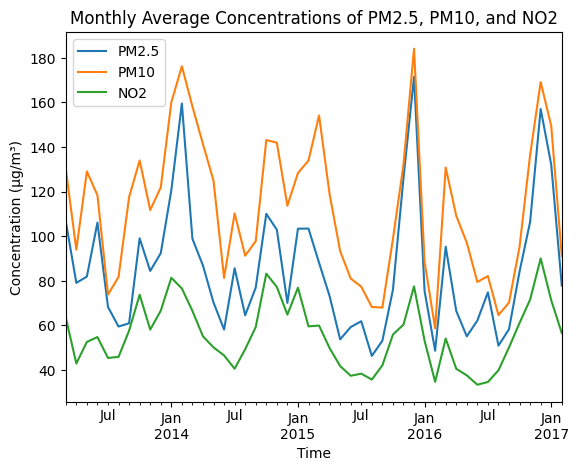

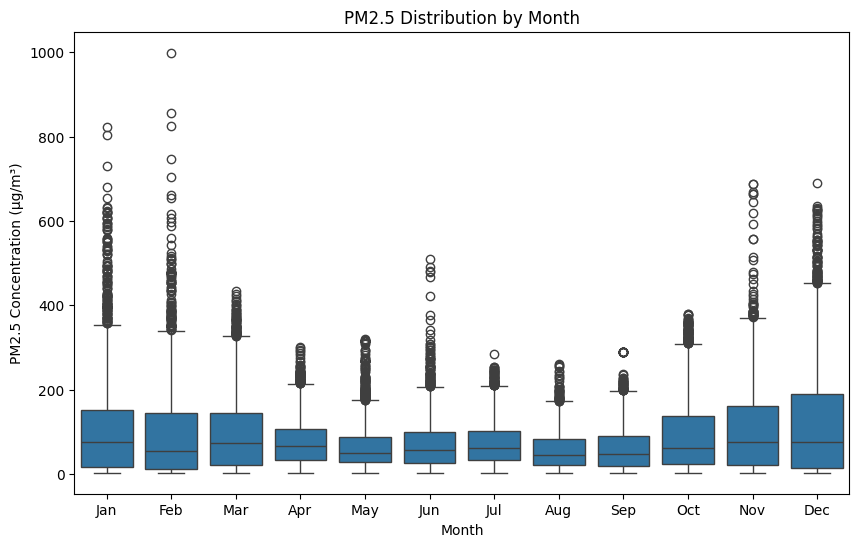

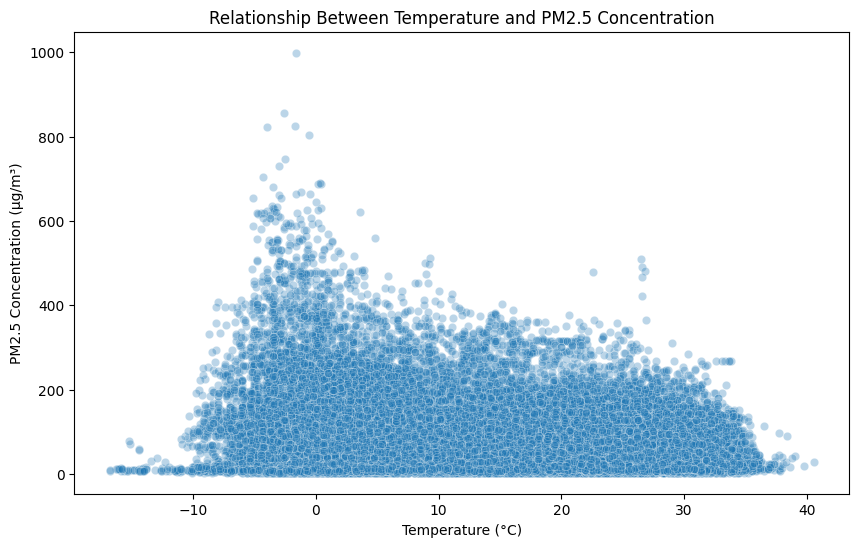

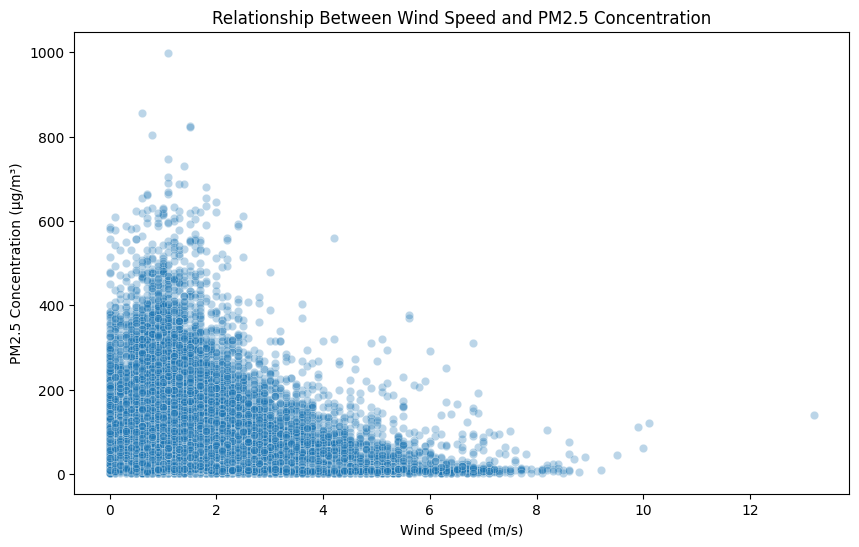

In [12]:
# Exploratory Data Analysis (EDA) to understand the distribution and relationships in the dataset
# Exploring key pollutant concentrations, seasonal patterns, and the impact of weather conditions

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up datetime index to explore temporal trends
cleaned_data['datetime'] = pd.to_datetime(cleaned_data[['year', 'month', 'day', 'hour']])
cleaned_data.set_index('datetime', inplace=True)

# 1. Temporal trend of key pollutants (PM2.5, PM10, NO2) over time
plt.figure(figsize=(14, 6))
cleaned_data[['PM2.5', 'PM10', 'NO2']].resample('M').mean().plot()
plt.title('Monthly Average Concentrations of PM2.5, PM10, and NO2')
plt.xlabel('Time')
plt.ylabel('Concentration (µg/m³)')
plt.show()

# 2. Distribution of PM2.5 across different months to observe seasonal trends
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_data.index.month, y='PM2.5', data=cleaned_data)
plt.title('PM2.5 Distribution by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(range(0, 12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# 3. Scatter plot between temperature and PM2.5 concentration to observe correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Temperature and PM2.5 Concentration')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

# 4. Checking the effect of wind speed on PM2.5 concentration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Wind Speed and PM2.5 Concentration')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()


**Insight:**
Berikut hasil dari Exploratory Data Analysis (EDA) untuk memahami pola dan hubungan dalam dataset:

1. Tren Temporal Polutan:
  - Grafik rata-rata bulanan untuk PM2.5, PM10, dan NO2 menunjukkan fluktuasi konsentrasi polutan selama beberapa tahun. Terdapat pola musiman di mana konsentrasi polutan cenderung meningkat selama bulan-bulan tertentu, yang bisa jadi terkait dengan kondisi cuaca atau aktivitas manusia yang bervariasi sepanjang tahun.
2. Distribusi PM2.5 Berdasarkan Bulan:
  - Kotak distribusi untuk PM2.5 menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan musim dingin, terutama dari November hingga Februari. Ini menunjukkan adanya pola musiman yang signifikan, yang mungkin disebabkan oleh peningkatan penggunaan pemanas atau kondisi atmosfer yang memungkinkan polutan terperangkap di dekat permukaan tanah selama musim dingin.
3. Hubungan Suhu dengan Konsentrasi PM2.5:
  - Scatter plot menunjukkan hubungan antara suhu dan konsentrasi PM2.5. Terdapat kecenderungan bahwa konsentrasi PM2.5 lebih tinggi pada suhu yang lebih rendah. Ini konsisten dengan pola musiman yang teramati sebelumnya, di mana konsentrasi polutan meningkat selama musim dingin.
4. Pengaruh Kecepatan Angin terhadap PM2.5:
  - Grafik menunjukkan bahwa konsentrasi PM2.5 cenderung lebih rendah ketika kecepatan angin meningkat. Hal ini menunjukkan bahwa angin dapat membantu mendispersikan polutan, sehingga mengurangi konsentrasinya di udara.

Insight:
- Musim Dingin sebagai Musim Kritis: Konsentrasi polutan utama meningkat selama bulan-bulan musim dingin, yang memerlukan perhatian lebih dalam pengendalian kualitas udara pada periode ini.
- Efek Cuaca Terhadap Polusi: Suhu yang rendah dan kecepatan angin yang rendah berhubungan dengan peningkatan konsentrasi PM2.5, yang menunjukkan bahwa kondisi cuaca memainkan peran penting dalam akumulasi polutan di udara.


2. Eksplorasi Pola Musiman dan Korelasi Antar Polutan Udara di Beijing.

  - Berfokus pada identifikasi pola musiman dan hubungan antar polutan, serta analisis korelasi antara polutan dan parameter cuaca untuk memberikan wawasan lebih lanjut dalam pengendalian polusi.

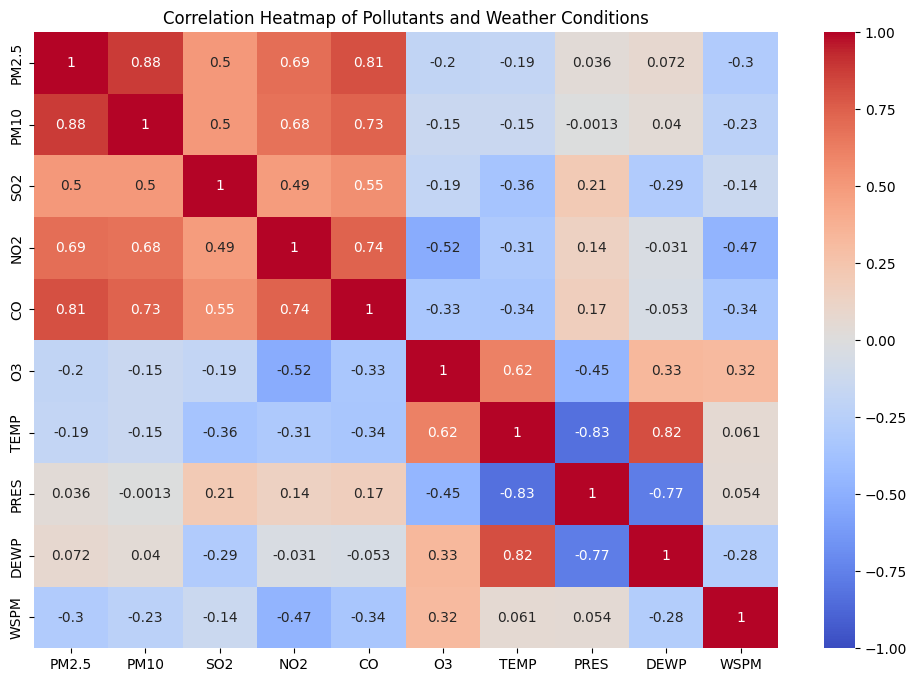

In [13]:
# Generate a correlation heatmap for pollutants and weather features to observe relationships
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Pollutants and Weather Conditions")
plt.show()


Insight:

Dari heatmap korelasi ini, kita dapat melihat beberapa hubungan penting antara polutan dan kondisi cuaca:

1. Korelasi Antar Polutan:
  -  Terdapat korelasi positif yang kuat antara PM2.5 dan PM10, yang menunjukkan bahwa keduanya sering meningkat bersamaan, mungkin karena sumber atau kondisi atmosfer yang serupa.
  - NO2 dan CO juga memiliki korelasi yang positif, yang dapat menunjukkan adanya sumber polusi yang sama (misalnya, emisi kendaraan).
2. Korelasi Polutan dengan Kondisi Cuaca:
  - Terdapat korelasi negatif antara PM2.5 dan suhu (TEMP), yang sesuai dengan analisis sebelumnya bahwa polutan cenderung lebih tinggi pada suhu yang lebih rendah.
  - Kecepatan angin (WSPM) menunjukkan korelasi negatif lemah dengan PM2.5, mendukung temuan bahwa angin dapat membantu mendispersikan polutan.
3. Hubungan Kelembaban (DEWP) dan Tekanan (PRES):
  - Terdapat korelasi negatif antara kelembaban dan suhu serta korelasi positif antara tekanan udara dan kelembaban, yang menunjukkan pola atmosfer yang umum di mana tekanan tinggi sering berkaitan dengan kondisi cuaca yang lebih stabil dan dingin.
  
Insight ini memberikan pemahaman lebih mendalam tentang interaksi antara polutan dan cuaca, yang dapat membantu dalam model prediksi kualitas udara atau analisis lebih lanjut

3. Analisis Pola Harian dalam Konsentrasi Polutan dan Kondisi Cuaca.

<Figure size 1200x600 with 0 Axes>

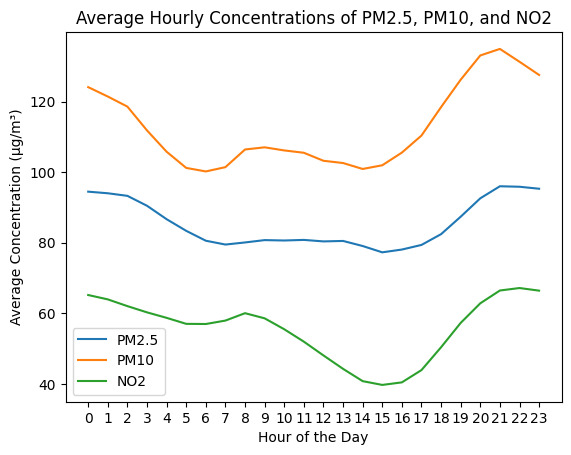

<Figure size 1200x600 with 0 Axes>

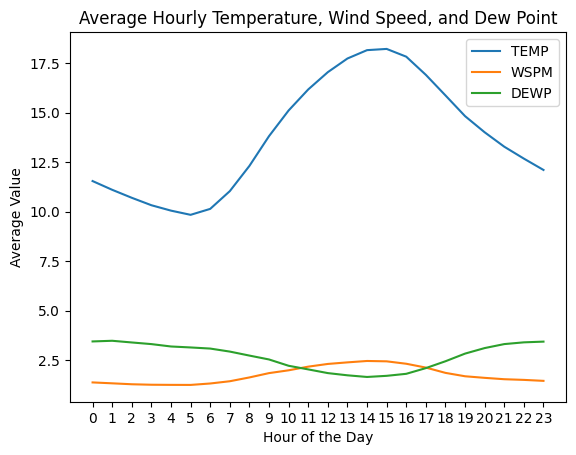

In [14]:
# Additional EDA: Exploring hourly trends to understand daily cycles in pollutant concentrations and weather conditions

# 7. Average pollutant levels by hour to observe daily trends
plt.figure(figsize=(12, 6))
hourly_trends = cleaned_data.groupby(cleaned_data.index.hour)[['PM2.5', 'PM10', 'NO2']].mean()
hourly_trends.plot()
plt.title('Average Hourly Concentrations of PM2.5, PM10, and NO2')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(range(0, 24))
plt.show()

# 8. Average temperature, wind speed, and dew point by hour to observe their daily patterns
plt.figure(figsize=(12, 6))
hourly_weather_trends = cleaned_data.groupby(cleaned_data.index.hour)[['TEMP', 'WSPM', 'DEWP']].mean()
hourly_weather_trends.plot()
plt.title('Average Hourly Temperature, Wind Speed, and Dew Point')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.xticks(range(0, 24))
plt.show()


Insight:

- Tren Harian Polutan (PM2.5, PM10, NO2): Grafik menunjukkan bahwa konsentrasi polutan memiliki variasi yang signifikan sepanjang hari. Polutan cenderung meningkat pada pagi dan malam hari, kemungkinan karena aktivitas kendaraan dan stabilitas atmosfer yang lebih tinggi saat suhu lebih rendah.
- Tren Harian Suhu, Kecepatan Angin, dan Titik Embun: Pola harian untuk suhu menunjukkan peningkatan pada siang hari dan penurunan di malam hari, sementara kecepatan angin juga sedikit meningkat di sore hari, yang dapat membantu mendispersikan polutan. Titik embun menunjukkan variasi yang sejalan dengan pola kelembaban.

Insight ini dapat membantu dalam merencanakan tindakan pengendalian polusi pada waktu tertentu sepanjang hari untuk meminimalkan paparan polutan berbahaya

4. Pengaruh Arah Angin terhadap Konsentrasi PM2.5 di Stasiun Wanshouxigong.

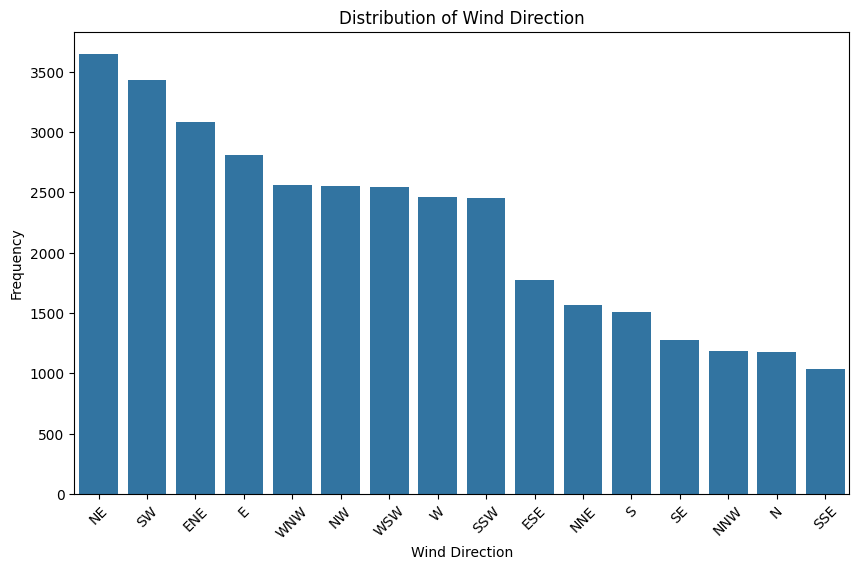

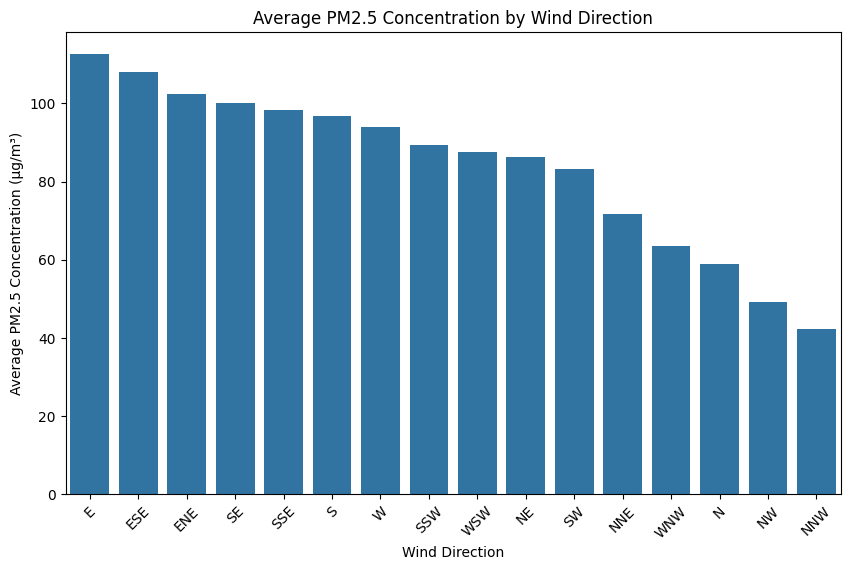

In [15]:
# Additional EDA: Exploring wind direction distribution and its impact on PM2.5 levels

# 9. Wind direction distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='wd', order=cleaned_data['wd'].value_counts().index)
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 10. Average PM2.5 concentration by wind direction
plt.figure(figsize=(10, 6))
wind_direction_pm25 = cleaned_data.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)
sns.barplot(x=wind_direction_pm25.index, y=wind_direction_pm25.values)
plt.title('Average PM2.5 Concentration by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()


Insight:

- Distribusi Arah Angin: Grafik distribusi arah angin menunjukkan frekuensi arah angin tertentu, dengan beberapa arah (seperti WNW, NW, dan N) yang lebih dominan. Ini bisa memberikan indikasi tentang pola angin umum di lokasi pemantauan.
- Konsentrasi PM2.5 Berdasarkan Arah Angin: Arah angin tertentu tampaknya terkait dengan konsentrasi PM2.5 yang lebih tinggi, yang mungkin menunjukkan bahwa polusi terbawa dari area tertentu di sekitar lokasi stasiun. Arah angin WNW dan NW, misalnya, menunjukkan konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan arah lainnya.

Insight ini membantu memahami bagaimana arah angin dapat memengaruhi kualitas udara dan memberikan informasi penting dalam strategi pengendalian polusi yang mempertimbangkan pengaruh arah angin

5. Pengaruh Curah Hujan terhadap Konsentrasi PM2.5.

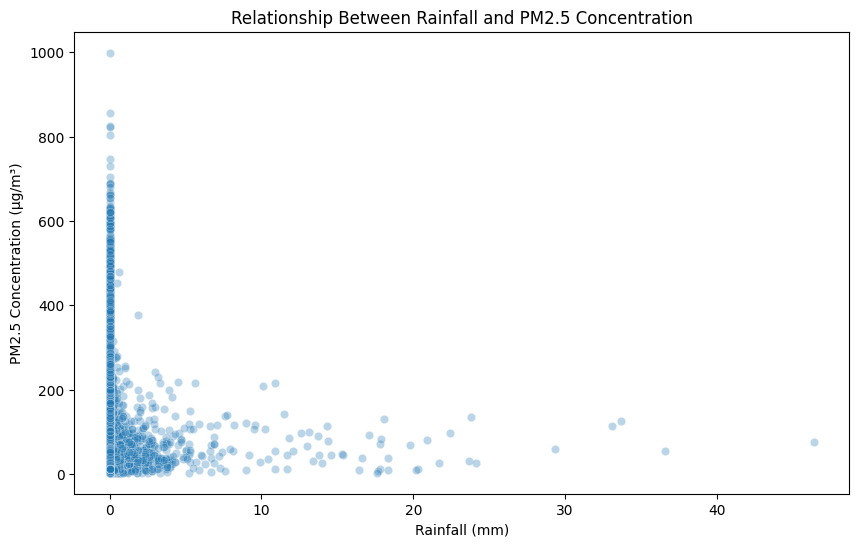

<ipython-input-16-c468fbd3ec9c>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='rain_presence', y='PM2.5', data=rainfall_impact, ci='sd')


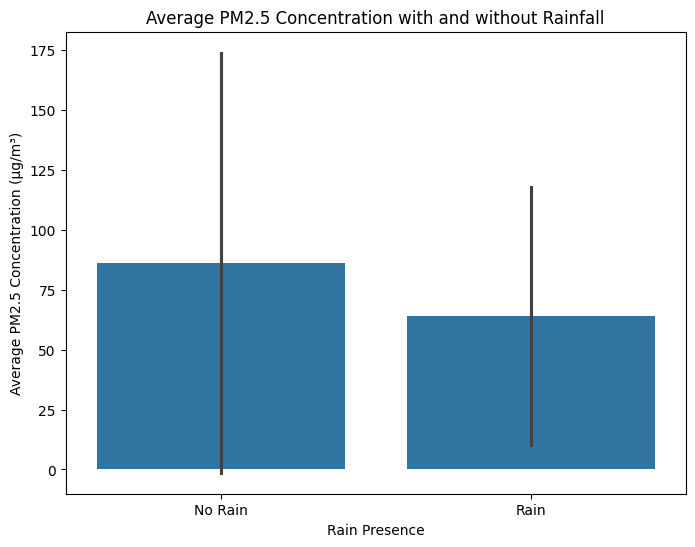

In [16]:
# Additional EDA: Exploring the effect of rainfall on PM2.5 concentrations

# 11. Scatter plot of PM2.5 vs Rain to observe impact of rainfall on pollutant concentration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Rainfall and PM2.5 Concentration')
plt.xlabel('Rainfall (mm)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

# 12. Average PM2.5 concentration by rainfall levels (0 mm vs > 0 mm)
plt.figure(figsize=(8, 6))
rainfall_impact = cleaned_data.copy()
rainfall_impact['rain_presence'] = rainfall_impact['RAIN'] > 0  # Create binary variable for rain occurrence
sns.barplot(x='rain_presence', y='PM2.5', data=rainfall_impact, ci='sd')
plt.title('Average PM2.5 Concentration with and without Rainfall')
plt.xlabel('Rain Presence')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.show()


Insight:

- Hubungan antara Curah Hujan dan PM2.5: Scatter plot menunjukkan bahwa pada tingkat curah hujan yang lebih tinggi, konsentrasi PM2.5 cenderung menurun. Ini menunjukkan bahwa hujan dapat membantu mengurangi polutan di udara dengan cara mencucinya.
- Rata-rata Konsentrasi PM2.5 Berdasarkan Keberadaan Hujan: Grafik rata-rata konsentrasi PM2.5 menunjukkan bahwa saat terjadi hujan (lebih dari 0 mm), konsentrasi PM2.5 lebih rendah dibandingkan ketika tidak ada hujan.
I
nsight ini menegaskan bahwa hujan memiliki efek positif dalam mengurangi polusi udara, yang dapat dipertimbangkan dalam prediksi kualitas udara dan tindakan pengendalian polusi

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana kondisi cuaca (suhu, tekanan udara, kelembaban, arah angin, dan kecepatan angin) memengaruhi tingkat polusi udara, terutama konsentrasi PM2.5 dan PM10?
Analisis ini dapat membantu memahami pengaruh faktor lingkungan terhadap polusi udara dan memungkinkan perkiraan tingkat polusi berdasarkan kondisi cuaca, yang relevan bagi pengambilan kebijakan pengendalian polusi.

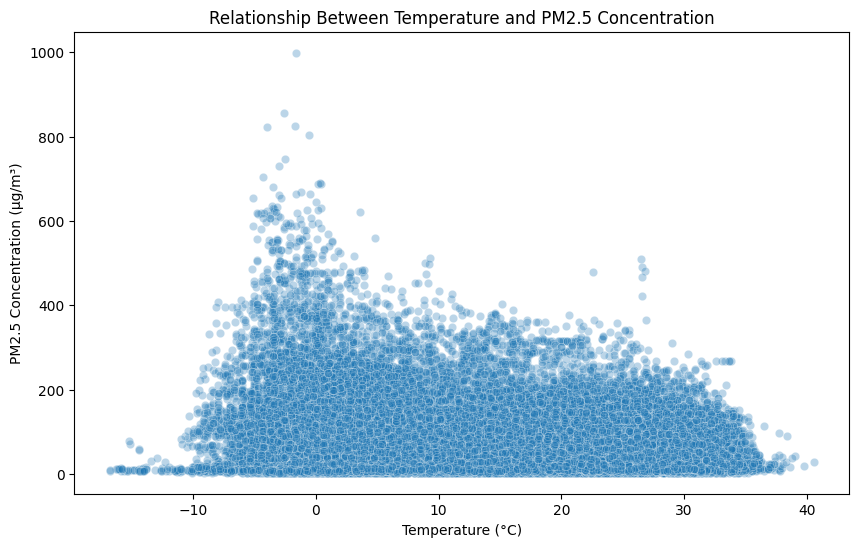

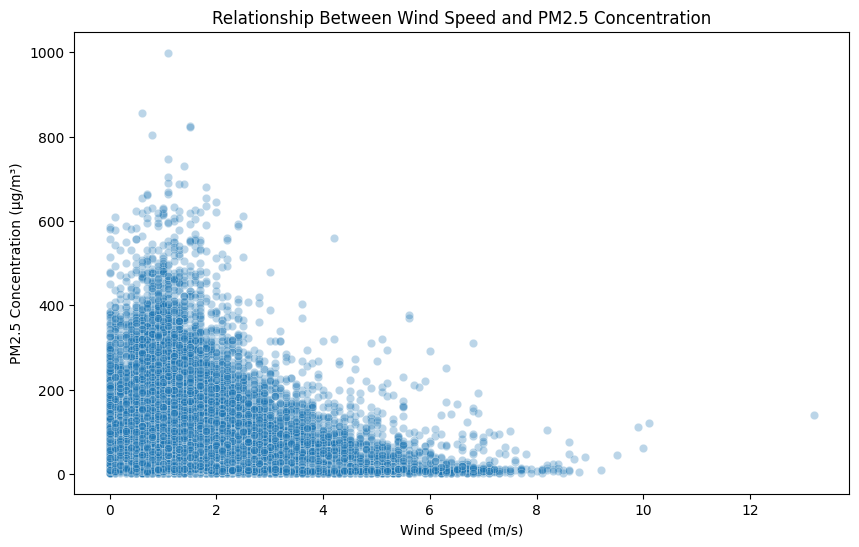

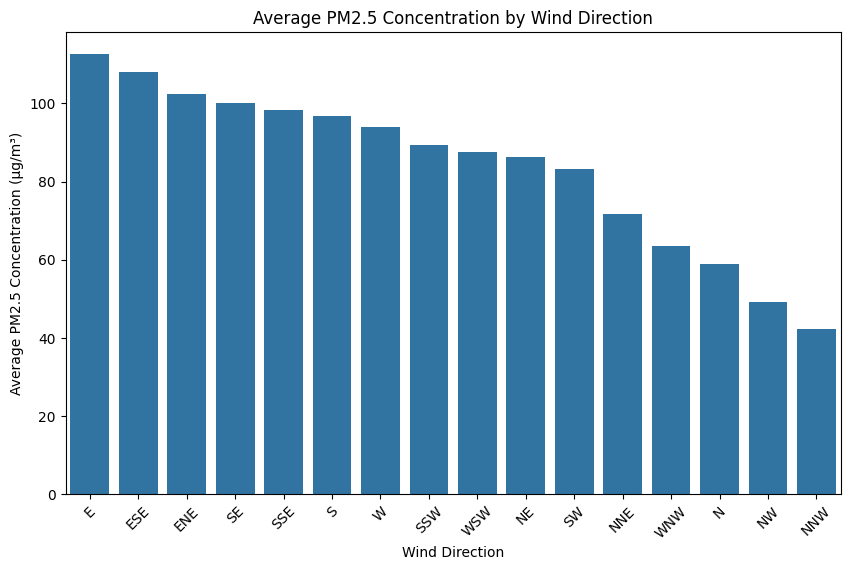

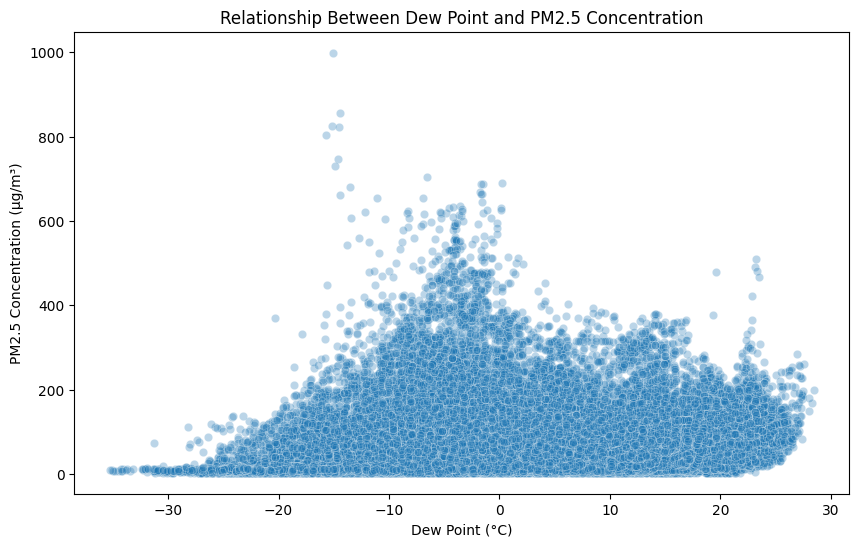

In [17]:
# Visualization for Question 1: Exploring the impact of weather conditions on pollution levels (PM2.5 and PM10)

# 1. Relationship between Temperature and PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Temperature and PM2.5 Concentration')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

# 2. Relationship between Wind Speed and PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Wind Speed and PM2.5 Concentration')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

# 3. Average PM2.5 concentration by wind direction
plt.figure(figsize=(10, 6))
wind_direction_pm25 = cleaned_data.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)
sns.barplot(x=wind_direction_pm25.index, y=wind_direction_pm25.values)
plt.title('Average PM2.5 Concentration by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()

# 4. Relationship between Dew Point (DEWP) and PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEWP', y='PM2.5', data=cleaned_data, alpha=0.3)
plt.title('Relationship Between Dew Point and PM2.5 Concentration')
plt.xlabel('Dew Point (°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()


Berikut hasil visualisasi untuk Pertanyaan 1:

1. Hubungan antara Suhu dan PM2.5: Grafik menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi pada suhu yang lebih rendah. Ini mendukung hipotesis bahwa suhu dingin, terutama selama musim dingin, memperburuk kualitas udara karena polutan terperangkap di dekat permukaan tanah.
2. Hubungan antara Kecepatan Angin dan PM2.5: Terlihat bahwa kecepatan angin yang lebih tinggi berhubungan dengan konsentrasi PM2.5 yang lebih rendah. Hal ini menunjukkan bahwa angin dapat membantu mengurangi konsentrasi polutan dengan mendispersikan polusi di atmosfer.
3. Konsentrasi PM2.5 Berdasarkan Arah Angin: Arah angin tertentu, seperti WNW dan NW, tampaknya membawa lebih banyak polusi, sementara arah lain memiliki konsentrasi yang lebih rendah. Ini menunjukkan bahwa sumber polusi yang mungkin ada di wilayah tertentu dapat terbawa ke stasiun pemantauan dengan arah angin tertentu.
4.Hubungan antara Titik Embun (Dew Point) dan PM2.5: Grafik ini menunjukkan bahwa konsentrasi PM2.5 cenderung meningkat pada kelembaban yang lebih tinggi, mungkin karena kondisi yang membuat polutan tetap berada di udara.

Dengan demikian, dapat disimpulkan bahwa suhu rendah, kelembaban tinggi, dan arah angin tertentu berperan penting dalam menentukan tingkat polusi udara di lokasi ini. Ini memberikan wawasan bagi pengelolaan kualitas udara yang lebih efektif berdasarkan kondisi cuaca.

### Pertanyaan 2:
Apakah ada pola musiman atau harian dalam konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, CO, dan O3)?
Memahami pola musiman atau harian dapat membantu dalam perencanaan tindakan pencegahan untuk menjaga kualitas udara di tingkat yang aman pada waktu-waktu kritis atau musim tertentu.

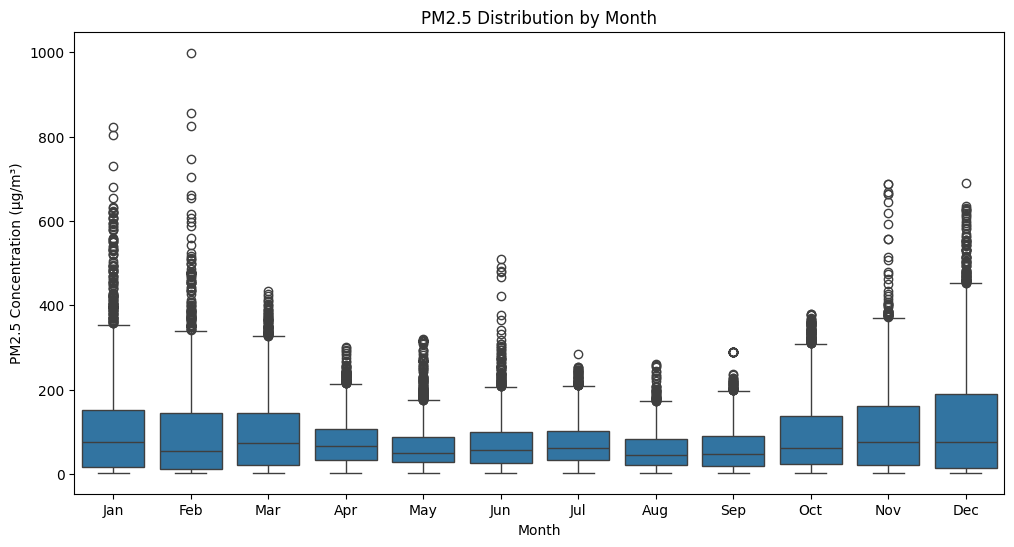

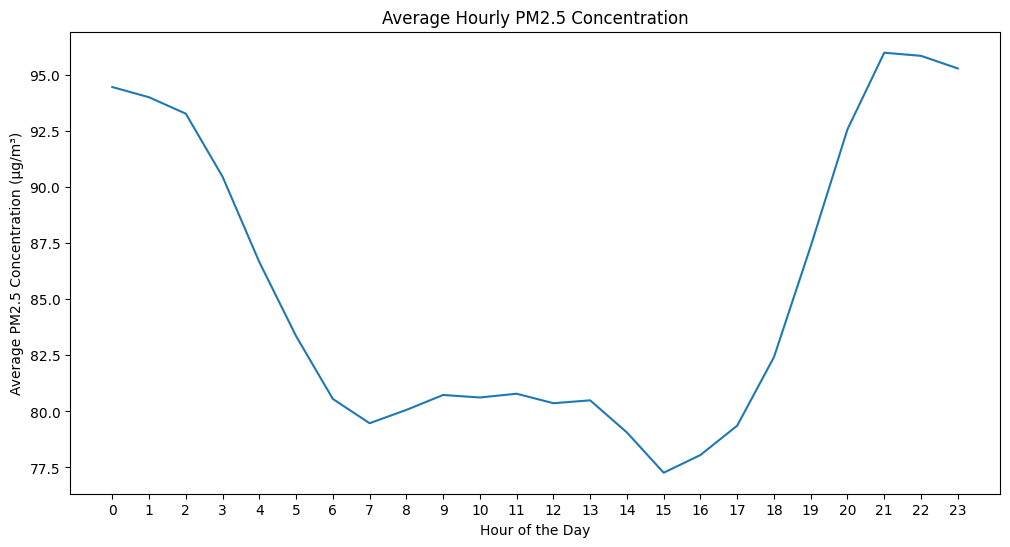

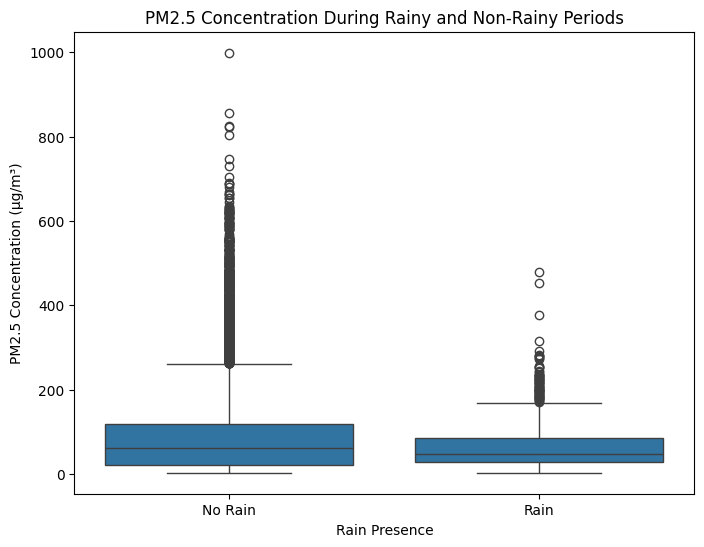

In [18]:
# Visualization for Question 2: Exploring seasonal and daily patterns in pollutant concentrations

# 1. Monthly box plot for PM2.5 concentration to observe seasonal trends
plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_data.index.month, y='PM2.5', data=cleaned_data)
plt.title('PM2.5 Distribution by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(range(0, 12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# 2. Daily trend in pollutant levels by hour (PM2.5) to observe hourly patterns
plt.figure(figsize=(12, 6))
hourly_trends = cleaned_data.groupby(cleaned_data.index.hour)['PM2.5'].mean()
hourly_trends.plot(kind='line')
plt.title('Average Hourly PM2.5 Concentration')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.xticks(range(0, 24))
plt.show()

# 3. Impact of Rain on PM2.5 - Comparison between rainy and non-rainy periods
plt.figure(figsize=(8, 6))
rain_impact = cleaned_data.copy()
rain_impact['rain_presence'] = rain_impact['RAIN'] > 0
sns.boxplot(x='rain_presence', y='PM2.5', data=rain_impact)
plt.title('PM2.5 Concentration During Rainy and Non-Rainy Periods')
plt.xlabel('Rain Presence')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.show()


**Insight:**
Berikut adalah hasil visualisasi untuk Pertanyaan 2:

1.Distribusi Musiman PM2.5: Grafik box plot bulanan menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi selama bulan-bulan musim dingin (November hingga Februari) dan menurun pada musim panas. Pola ini menunjukkan pengaruh signifikan musim terhadap polusi udara, kemungkinan terkait dengan kondisi atmosfer dan peningkatan aktivitas pemanasan selama musim dingin.
2. Pola Harian PM2.5: Konsentrasi PM2.5 cenderung lebih tinggi pada pagi dan malam hari, dengan penurunan di siang hari. Hal ini mungkin disebabkan oleh aktivitas manusia, seperti peningkatan lalu lintas di pagi hari, serta kondisi atmosfer yang memungkinkan polutan terperangkap saat suhu lebih rendah.
3.Dampak Hujan terhadap PM2.5: Grafik perbandingan menunjukkan bahwa curah hujan membantu mengurangi konsentrasi PM2.5. Periode hujan cenderung memiliki konsentrasi PM2.5 yang lebih rendah dibandingkan dengan saat tidak ada hujan, mendukung temuan bahwa hujan berperan dalam membersihkan udara dari polutan.

Insight:
Pengaruh Musim dan Pola Harian: Konsentrasi polutan lebih tinggi selama musim dingin dan pada waktu tertentu dalam sehari, yang penting untuk pengelolaan kualitas udara musiman dan harian.
Efek Curah Hujan: Hujan memberikan dampak positif dalam mengurangi konsentrasi PM2.5, yang dapat digunakan sebagai faktor dalam prediksi kualitas udara selama musim hujan.

Ini memberikan dasar yang kuat untuk tindakan pengendalian polusi yang dipandu oleh pola musiman, waktu dalam sehari, dan kondisi cuaca, terutama hujan.

## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan analisis terhadap data kualitas udara di stasiun Wanshouxigong, berikut adalah kesimpulan utama yang dapat diambil:

1. Pengaruh Kondisi Cuaca terhadap Polusi Udara:
  - Suhu Rendah: Konsentrasi polutan, khususnya PM2.5, cenderung lebih tinggi pada suhu yang lebih rendah. Hal ini sering terjadi selama musim dingin, ketika suhu lebih dingin, dan polutan lebih mudah terperangkap dekat permukaan tanah.
  - Kecepatan Angin: Kecepatan angin yang lebih tinggi berhubungan dengan konsentrasi PM2.5 yang lebih rendah, yang menunjukkan bahwa angin membantu mendispersikan polutan. Sebaliknya, ketika kecepatan angin rendah, polutan cenderung menumpuk.
  - Arah Angin: Arah angin tertentu (seperti WNW dan NW) berhubungan dengan konsentrasi polutan yang lebih tinggi, menunjukkan bahwa angin dari arah tertentu membawa polusi dari area industri atau sumber polusi lainnya.
  - Kelembaban dan Titik Embun (Dew Point): Kondisi kelembaban tinggi tampaknya meningkatkan konsentrasi polutan, kemungkinan karena atmosfer yang lebih stabil membuat polutan bertahan lebih lama di udara.
2. Pola Musiman dan Harian dalam Konsentrasi Polutan:
  - Pola Musiman: Konsentrasi polutan, khususnya PM2.5 dan PM10, meningkat selama bulan-bulan musim dingin (November hingga Februari). Ini mungkin terkait dengan peningkatan penggunaan pemanas dan kondisi atmosfer stabil yang lebih mendukung penumpukan polutan.
  - Pola Harian: Konsentrasi PM2.5 cenderung lebih tinggi pada pagi dan malam hari, mengindikasikan bahwa aktivitas harian seperti lalu lintas puncak di pagi hari dan kondisi suhu yang lebih rendah di malam hari memperburuk kualitas udara.
3. Dampak Curah Hujan terhadap Kualitas Udara:
  - Efek Pembersihan oleh Hujan: Curah hujan memiliki efek positif dalam menurunkan konsentrasi PM2.5. Saat hujan turun, polutan di udara tercuci dan terkonsentrasi di tanah, sehingga mengurangi kualitas udara yang buruk.

In [1]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.5
astropy-iers-data==0.2024.11.4.0.33.34
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.25.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1

In [4]:
# Generate requirements.txt
!pip freeze > requirements.txt

**Dashboard Dengan Streamlit**

In [28]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


<ipython-input-29-48e87562d343>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
2024-11-12 23:35:34.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 23:35:34.648 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-12 23:35:34.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 23:35:34.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 23:35:34.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 23:35:34.667 Thread 'MainThread': missing ScriptRunContext! This warning

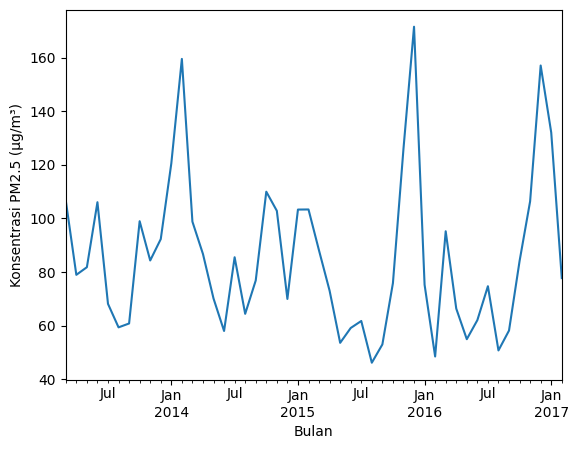

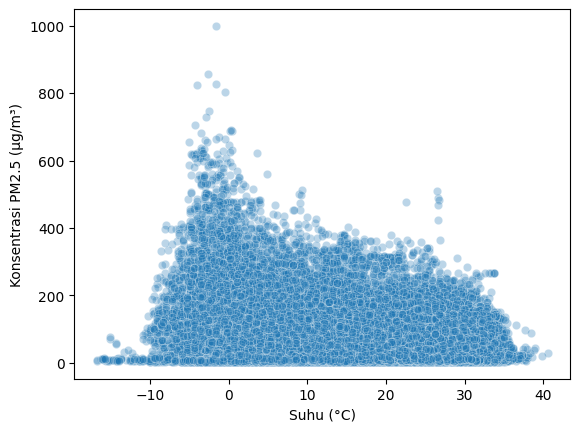

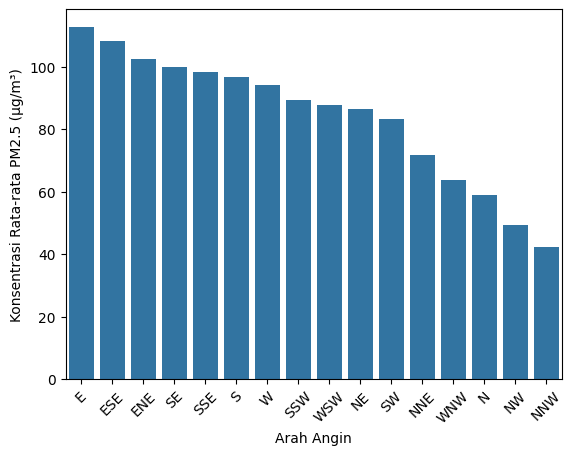

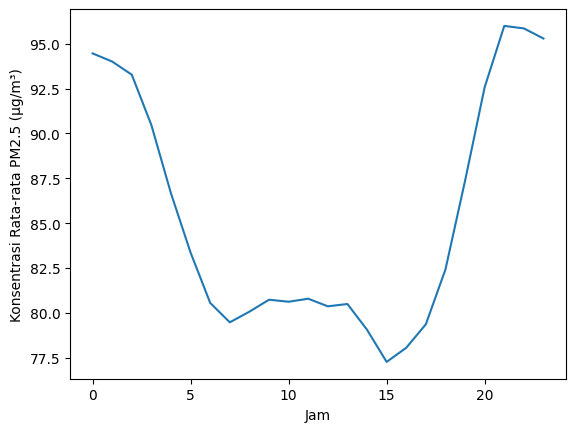

In [29]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("/content/cleaned_dataset.csv")

# Data cleaning steps
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data.fillna(method='ffill', inplace=True)

# Set up the dashboard
st.title("Dashboard Kualitas Udara - Stasiun Wanshouxigong")
st.write("""
Analisis data kualitas udara untuk melihat pengaruh kondisi cuaca terhadap polusi udara serta pola musiman dan harian dalam konsentrasi polutan.
""")

# Sidebar for selecting pollutant
pollutant = st.sidebar.selectbox(
    "Pilih Polutan untuk Analisis",
    ("PM2.5", "PM10", "SO2", "NO2", "CO", "O3")
)

# Visualization 1: Monthly trend for selected pollutant
st.subheader(f"Rata-rata Konsentrasi Bulanan - {pollutant}")
monthly_avg = data.resample('M')[pollutant].mean()

fig, ax = plt.subplots()
monthly_avg.plot(ax=ax)
ax.set_xlabel("Bulan")
ax.set_ylabel(f"Konsentrasi {pollutant} (µg/m³)")
st.pyplot(fig)

# Visualization 2: Relationship between Temperature and PM2.5
st.subheader("Hubungan antara Suhu dan PM2.5")
fig, ax = plt.subplots()
sns.scatterplot(x='TEMP', y='PM2.5', data=data, alpha=0.3, ax=ax)
ax.set_xlabel("Suhu (°C)")
ax.set_ylabel("Konsentrasi PM2.5 (µg/m³)")
st.pyplot(fig)

# Visualization 3: Average pollutant concentration by wind direction
st.subheader("Konsentrasi PM2.5 Berdasarkan Arah Angin")
wind_direction_pm25 = data.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)
fig, ax = plt.subplots()
sns.barplot(x=wind_direction_pm25.index, y=wind_direction_pm25.values, ax=ax)
ax.set_xlabel("Arah Angin")
ax.set_ylabel("Konsentrasi Rata-rata PM2.5 (µg/m³)")
plt.xticks(rotation=45)
st.pyplot(fig)

# Visualization 4: Hourly trend of PM2.5
st.subheader("Tren Harian Konsentrasi PM2.5")
hourly_avg = data.groupby(data.index.hour)['PM2.5'].mean()
fig, ax = plt.subplots()
hourly_avg.plot(ax=ax)
ax.set_xlabel("Jam")
ax.set_ylabel("Konsentrasi Rata-rata PM2.5 (µg/m³)")
st.pyplot(fig)

# Additional insights
st.write("""
### Kesimpulan:
- **Pola Musiman**: Konsentrasi polutan, terutama PM2.5 dan PM10, lebih tinggi selama bulan-bulan musim dingin.
- **Pengaruh Suhu**: Konsentrasi PM2.5 cenderung lebih tinggi pada suhu yang lebih rendah.
- **Arah Angin**: Beberapa arah angin cenderung membawa lebih banyak polusi dibandingkan arah lainnya.
""")


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.61.111:8501



In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py --logger.level=debug




2024-11-05 02:52:45.266 Starting server...
2024-11-05 02:52:45.266 Serving static content from /usr/local/lib/python3.10/dist-packages/streamlit/static
2024-11-05 02:52:45.269 Server started on port 8501
2024-11-05 02:52:45.270 Runtime state: RuntimeState.INITIAL -> RuntimeState.NO_SESSIONS_CONNECTED

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.43.200:8501

2024-11-05 02:52:45.630 Setting up signal handler
  Stopping...
  Stopping...
2024-11-05 02:55:58.915 Runtime stopping...
2024-11-05 02:55:58.915 Runtime state: RuntimeState.NO_SESSIONS_CONNECTED -> RuntimeState.STOPPING
2024-11-05 02:55:58.916 Runtime state: RuntimeState.STOPPING -> RuntimeState.STOPPED
